**Importing Dependencies**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

Let's first load the external data into our file explorer.

In [95]:
data = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv")

with open("starwars.csv", "w+") as f:
  f.write(data.text)

In [96]:
# read data into a pandas dataframe
df = pd.read_csv("starwars.csv")

In [97]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [98]:
df.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

**Cleaning the Data**
- We don't need the first row of the dataset

In [99]:
df.drop(index=0, axis=0) # alternatively, we could use df = df.iloc[1:]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [100]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

For now, I'm analyzing the first two columns: "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?"

In [101]:
survey_df = df[["RespondentID", "Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]].copy()

In [102]:
survey_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,NaN,Response,Response
1,3.292880e+09,Yes,Yes
2,3.292880e+09,No,NaN
3,3.292765e+09,Yes,No
4,3.292763e+09,Yes,Yes


Let's map the columns into boolean columns since python can understand `True` and `False`

In [103]:
new_values = {
    "Yes": True,
    "No": False
}

survey_df["Have you seen any of the 6 films in the Star Wars franchise?"] = survey_df["Have you seen any of the 6 films in the Star Wars franchise?"].map(new_values)

In [104]:
survey_df = survey_df.iloc[1:]

In [105]:
survey_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,Yes
2,3.292880e+09,False,NaN
3,3.292765e+09,True,No
4,3.292763e+09,True,Yes
5,3.292731e+09,True,Yes


In [106]:
# do the same for the other column
survey_df["Do you consider yourself to be a fan of the Star Wars film franchise?"] = survey_df["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(new_values)

In [107]:
survey_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True


**Counting survey results**

In [108]:
survey_df.value_counts("Have you seen any of the 6 films in the Star Wars franchise?")

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
dtype: int64

In [109]:
survey_df.value_counts("Do you consider yourself to be a fan of the Star Wars film franchise?")

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
False    284
dtype: int64

**Analysis of remaining columns**

In [110]:
# indexes are the same, so we can use them to combine both dataframes
survey_df = survey_df.merge(df.iloc[:,3:9].copy(), left_index=True, right_index=True)

In [111]:
survey_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


The data is messy to read, so I want to convert the values to `True` and `False` like I did with the previous columns. Note that there are `NaN` values. This could mean that either the person didn't answer or the person didn't watch it. For my analysis, I am going to assume that the person didn't watch the film.

In [112]:
survey_df.iloc[:,3:9] = survey_df.iloc[:,3:9].notnull()

In [113]:
survey_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


The column names are long, so it's best to shorten them for easier use.

In [114]:
columns = ["id", "seen_any", "fan", "seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]
survey_df.columns = columns

In [115]:
survey_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


In [116]:
# apply applies the function to every column; I dropped the first column since id is not important for my analysis
survey_df.iloc[:,1:].apply(pd.value_counts)

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,250,284,513,615,636,579,428,448
True,936,552,673,571,550,607,758,738


In [117]:
counts = survey_df.iloc[:,1:].apply(pd.value_counts)

In [118]:
total = survey_df.iloc[:,1:].apply(lambda x: x.count())

In [119]:
print(total)

seen_any    1186
fan          836
seen_1      1186
seen_2      1186
seen_3      1186
seen_4      1186
seen_5      1186
seen_6      1186
dtype: int64


In [120]:
# find percentages
percentages = counts / total

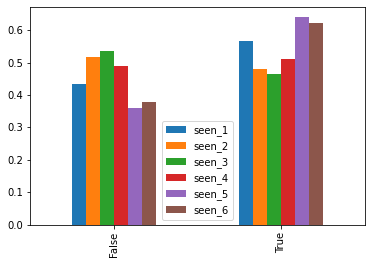

In [121]:
percentages.iloc[:,2:].plot.bar()

In [122]:
survey_df = survey_df.merge(df.iloc[:,9:15].copy(), left_index=True, right_index=True)

In [123]:
survey_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3


In [124]:
survey_df.iloc[:,9].dtype

dtype('O')

We need to convert the columns into floats to analyze the mean

In [125]:
survey_df[survey_df.columns[9:15]] = survey_df[survey_df.columns[9:15]].astype(float)

In [126]:
survey_df.iloc[:,9].describe()

count    835.000000
mean       3.732934
std        1.656122
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: float64

In [127]:
# Rename the columns again
columns += ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]

survey_df.columns = columns

In [128]:
survey_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


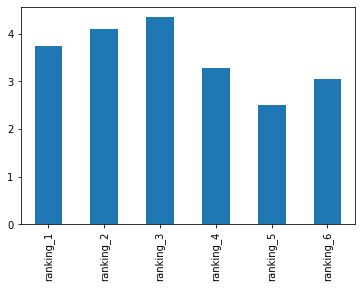

In [129]:
survey_df.iloc[:,9:15].mean().plot.bar()